# Введение в регулярные выражения

Хорошая статья по основам регулярных выражений:
https://habr.com/ru/articles/349860/

## Регулярные выражения в Python

В Python для работы с регулярными выражениями используется встроенный модуль re

In [1]:
import re

### Основные функции re

In [2]:
from re import search

Функция **search()** сканирует строку в поисках **первого совпадения** с регулярным выражением и возвращает специальный объект соответствия (тип Match) или значение None, если ни одна позиция в строке не соответствует регулярному выражению. 

In [3]:
text = 'Запись из дневника номер 123. Объект 26 находится под наблюдением. За последние три дня были выявлены ранее неизвестные свойства. Результаты анализов показывают, что в течение 365 дней объект может изменить свои химические данные. Исследования необходимо продлить еще на 14 дней.'
text

'Запись из дневника номер 123. Объект 26 находится под наблюдением. За последние три дня были выявлены ранее неизвестные свойства. Результаты анализов показывают, что в течение 365 дней объект может изменить свои химические данные. Исследования необходимо продлить еще на 14 дней.'

In [4]:
pattern = r'\b[Пп]\w*'
search(pattern, text) # первое слово, начинающееся на П(п)

<re.Match object; span=(50, 53), match='под'>

In [5]:
pattern = r'\d\d\d'    # первые три числа, идущих подряд
search(pattern, text)

<re.Match object; span=(25, 28), match='123'>

In [6]:
pattern = r'земля'
print(search(pattern, text)) # None 

None


In [7]:
from re import match

Функция **match()** возвращает специальный объект соответствия (тип Match), если **начало строки соответствуют** регулярному выражению, или значение None в противном случае.

In [24]:
pattern = r'Запись из дневника'
match(pattern, text)

<re.Match object; span=(0, 18), match='Запись из дневника'>

In [25]:
pattern = r'из дневника'
print(match(pattern, text))

None


In [12]:
from re import fullmatch  # если ВСЯ строка соотвествует паттерну

text_a = 'Hello WoRLd!!!!'
pattern = r'.*\bhello world\b.*'

fullmatch(pattern, text_a, flags=re.IGNORECASE)  # флаги*

<re.Match object; span=(0, 15), match='Hello WoRLd!!!!'>

### Объекты типа Match

In [13]:
text = 'Запись из дневника номер 123. Объект 26 находится под наблюдением. За последние три дня были выявлены ранее неизвестные свойства. Результаты анализов показывают, что в течение 365 дней объект может изменить свои химические данные. Исследования необходимо продлить еще на 14 дней.'
text

'Запись из дневника номер 123. Объект 26 находится под наблюдением. За последние три дня были выявлены ранее неизвестные свойства. Результаты анализов показывают, что в течение 365 дней объект может изменить свои химические данные. Исследования необходимо продлить еще на 14 дней.'

In [22]:
pattern = r'((\d\d)\d)'    # первые три числа, идущих подряд
match1 = search(pattern, text)

In [23]:
match1

<re.Match object; span=(25, 28), match='123'>

In [16]:
print(match1.group(1, 2))  # возвращает одну или несколько подгрупп совпадения
print(match1.group(1))
print(match1.group(2))

# Вызов метода group() без аргументов, равнозначен вызову с аргументом 0, то есть group(0)

('123', '12')
123
12


In [73]:
# важно понимать, как работают группировка и обратные ссылки

In [76]:
pattern = r'(ab)(cd)\1'   # \1 - ссылка на первую группу
text = 'abcdab'
match = re.search(pattern, text)
if match:
    print(match.group(0))  # Вывод: 'abcdab'
    print(match.group(1))  # Вывод: 'ab'
    print(match.group(2))  # Вывод: 'cd'

abcdab
ab
cd


In [72]:
pattern = r'(ба)(рон)'
text = 'барон'
new_text = re.sub(pattern, r'\2\1',text)  # Меняем группы местами
print(new_text) 

ронба


In [17]:
match1.groups() # кортеж всех захваченных групп

('123', '12')

In [18]:
# Методы start() и end() возвращают индексы начала и конца подстроки, которая совпала с регулярным выражением.
print(match1.start())
print(match1.end())

25
28


In [19]:
match1.span()

(25, 28)

### Флаги

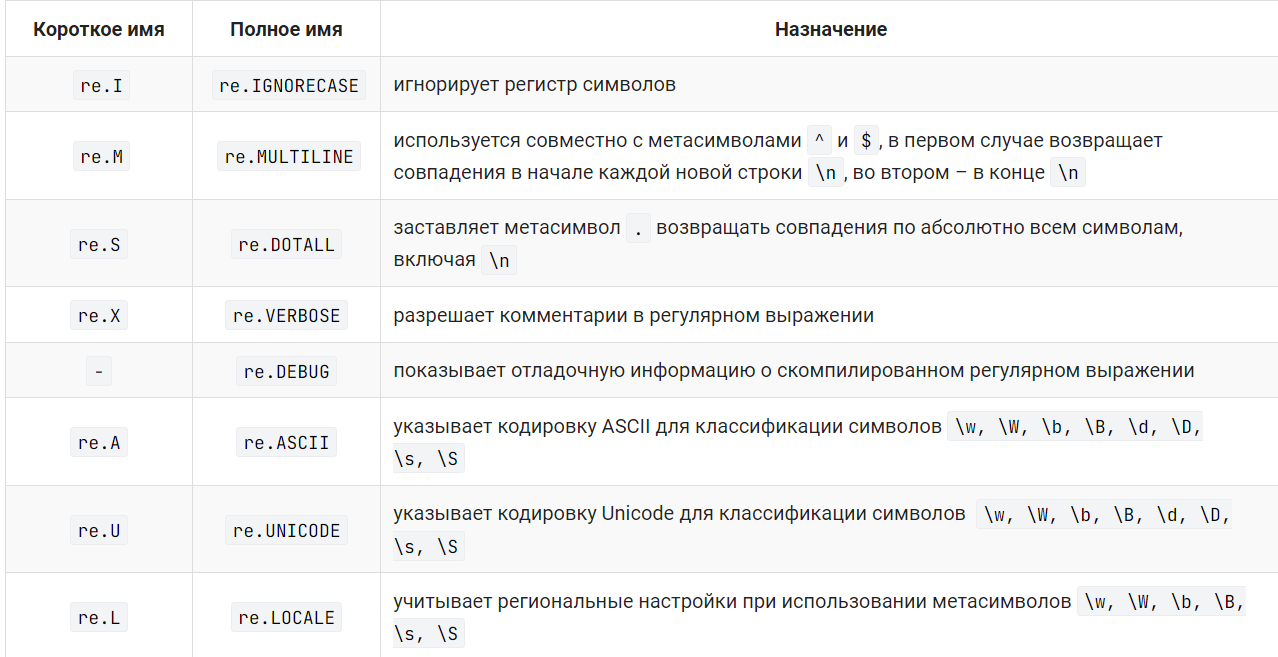

### Функции findall(), finditer()

In [26]:
from re import findall, finditer

Функция **findall()** возвращает все неперекрывающиеся совпадения с регулярным выражением в виде списка строк. 

In [27]:
text

'Запись из дневника номер 123. Объект 26 находится под наблюдением. За последние три дня были выявлены ранее неизвестные свойства. Результаты анализов показывают, что в течение 365 дней объект может изменить свои химические данные. Исследования необходимо продлить еще на 14 дней.'

In [28]:
pattern = r'\b\w\w\w\b'  # трёхсимвольные слова

In [29]:
findall(pattern,text)

['123', 'под', 'три', 'дня', 'что', '365', 'еще']

Функция **finditer()** возвращает все неперекрывающиеся совпадения с регулярным выражением в виде итератора, содержащего объекты соответствия (тип Match)

In [30]:
for el in finditer(pattern,text):
    print(el)

<re.Match object; span=(25, 28), match='123'>
<re.Match object; span=(50, 53), match='под'>
<re.Match object; span=(80, 83), match='три'>
<re.Match object; span=(84, 87), match='дня'>
<re.Match object; span=(162, 165), match='что'>
<re.Match object; span=(176, 179), match='365'>
<re.Match object; span=(264, 267), match='еще'>


### Функции sub(), subn()

In [31]:
from re import sub, subn

Функция **sub()** возвращает строку, полученную путем замены всех найденных неперекрывающихся вхождений регулярного выражения pattern в строке string на строку замены repl.

In [33]:
text = 'число 25 - это 5 умножить на 5 или 20 + 5'
text

'число 25 - это 5 умножить на 5 или 20 + 5'

In [34]:
pattern_word = r'\b[а-я]+\b'
pattern_digit = r'\b\d+\b'

In [35]:
sub(pattern_word,'*',text)

'* 25 - * 5 * * 5 * 20 + 5'

In [36]:
sub(pattern_digit, '*',text)

'число * - это * умножить на * или * + *'

In [37]:
# можно заменять определенное кол-во 

sub(pattern_digit, '*',text,3)

'число * - это * умножить на * или 20 + 5'

In [38]:
# кортеж, состоящий из измененной строки и количества сделанных замен
subn(pattern_digit, '*',text) 

('число * - это * умножить на * или * + *', 5)

In [39]:
# можно маневрировать ссылками
result = sub(r'(?P<surname>\w+) (?P<name>\w+)', r'\g<name> \g<surname>', 'Ivan Smit')
result

'Smit Ivan'

In [41]:
result = sub(r'(\w+)-(\w+)', r'\2-\1', 'pank-style, self-made, twenty-six')
result

'style-pank, made-self, six-twenty'

In [42]:
text

'число 25 - это 5 умножить на 5 или 20 + 5'

In [43]:
# параметр замены может быть функцией, которая работает с объектом Match
def func(match_obj):
    obj = match_obj.group()  # строка совпадения
    if obj.isdigit():
        return str(int(obj)*10)
    else:
        return obj.upper()

In [44]:
sub(pattern_word,func,text)

'ЧИСЛО 25 - ЭТО 5 УМНОЖИТЬ НА 5 ИЛИ 20 + 5'

In [45]:
sub(pattern_digit, func, text)

'число 250 - это 50 умножить на 50 или 200 + 50'

### Функция split()

In [46]:
# обычная функция split
text = 'Письмо из будущего'
text.split()

['Письмо', 'из', 'будущего']

In [47]:
re.split('\s',text) # разделитель по шаблону

['Письмо', 'из', 'будущего']

In [48]:
text = 'cat32dog3321fox023alex21horse'
pattern = r'\d+'
re.split(pattern,text)

['cat', 'dog', 'fox', 'alex', 'horse']

In [49]:
# если регулярное выражение заключить в скобки
text = 'cat32dog3321fox023alex21horse'
pattern = r'(\d+)'
re.split(pattern,text) # в списке будут и разделители

['cat', '32', 'dog', '3321', 'fox', '023', 'alex', '21', 'horse']

### Функция compile()

Модуль **re** компилирует и кэширует регулярное выражение, когда оно используется в вызове функции. Если одно и то же регулярное выражение используется впоследствии в том же коде, оно не перекомпилируется. Вместо этого скомпилированное значение извлекается из кэша. В общем, нет никаких веских причин для компиляции регулярного выражения. Это всего лишь еще один инструмент в вашем наборе инструментов, который вы можете использовать, если считаете, что он улучшит читабельность или структуру вашего кода.

In [ ]:
reg_digits = re.compile(r'\d+')

In [ ]:
reg_words = re.compile(r'\b[а-я]+\b',flags=re.I)

In [ ]:
text = 'Заметка 8. Объект 25 вышел из зоны Б3.'

In [ ]:
re.findall(reg_digits,text)

In [ ]:
re.findall(reg_words,text)

In [ ]:
# можно использоват методы
reg_digits.findall('Это строка с цифрами 44 и 35')

Данные методы ведут себя так же, как соответствующие (одноименные) им функции модуля re, за исключением того, что они также поддерживают необязательные аргументы pos и endpos.

Если аргументы pos и endpos переданы, то поиск применяется только к части строки string, от pos (включительно), до endpos (не включительно), подобно индексам в срезах.

In [ ]:
text

In [ ]:
reg_digits.findall(text,pos=1, endpos=10)